In [1]:
import torch
from gan_evaluation import generate_images, pca_images, plot_pca
from utils import get_dataset_custom_training
from torch.utils.data import DataLoader
import os
from tqdm import tqdm
from src.gan_evaluation import classifier_accuracy, load_classifier, calculate_emd
from src.gan_evaluation import plot_images

In [3]:
# Load the MNIST dataset
_, test_dataset = get_dataset_custom_training('mnist')
testloader = DataLoader(test_dataset, batch_size=128, shuffle=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
fake_images = torch.load(os.path.join('..', 'weights', 'fake_images.pt')).to(device)
fake_labels = torch.load(os.path.join('..', 'weights', 'labels_list.pt')).to(device)

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

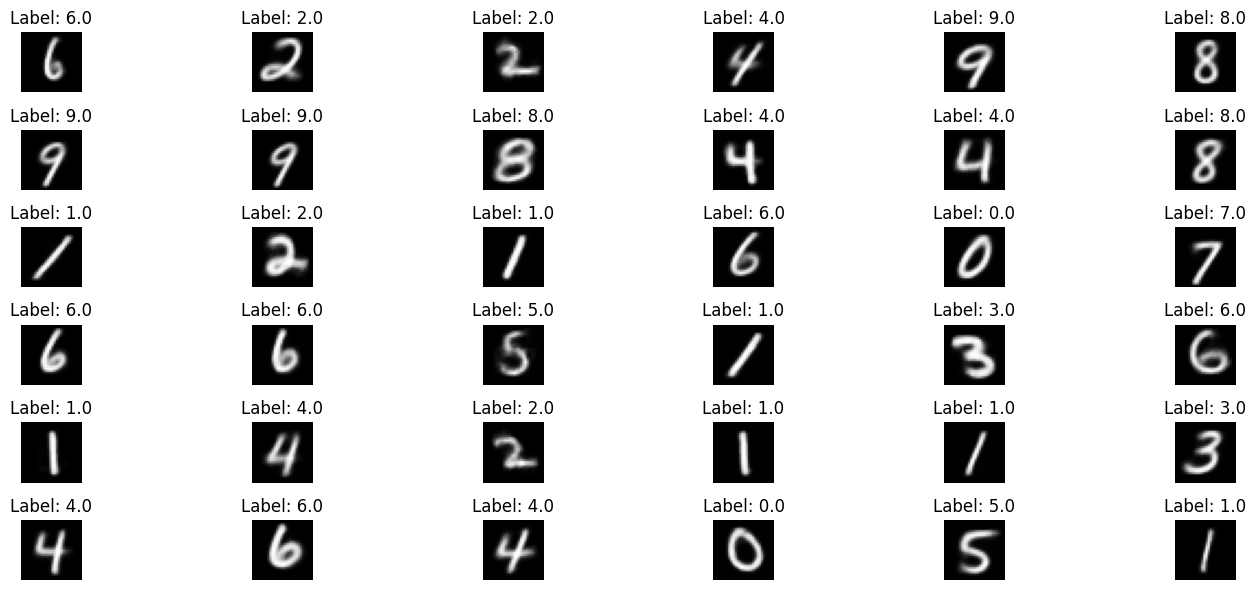

Testing: 100%|██████████| 79/79 [00:03<00:00, 24.18it/s]


Earth Mover's Distance: 0.9102349174767743
Real images accuracy: 0.1015, Fake images accuracy: 0.9868


In [6]:
real_preds = 0
fake_preds = 0
emd_real_images = torch.empty(0, ).to(device)
emd_fake_images = torch.empty(0, ).to(device)
labels_list = torch.empty(0, ).to(device)


model = load_classifier('mnist', model_path=os.path.join('..', 'weights', 'mnist_classifier.pth'))
x=0
for batch_idx, (images, labels) in enumerate(tqdm(testloader, f"Testing: ")):
    images = images.to(device)
    labels = labels.to(device)
    if(batch_idx == 0):
        plot_images(fake_images.cpu(), fake_labels.cpu(), num_images=36, num_cols=6, num_rows=6)
    emd_real_images = torch.cat((emd_real_images, images), dim=0)
    emd_fake_images = torch.cat((emd_fake_images, fake_images[x:x+len(images)]), dim=0)
    labels_list = torch.cat((labels_list, labels), dim=0)
    real_preds_temp, fake_preds_temp = classifier_accuracy(model, images, fake_images[x:x+len(images)], fake_labels[x:x+128], 'mnist',
                                                           device)
    real_preds += real_preds_temp
    fake_preds += fake_preds_temp
    x += 128

real_accuracy = real_preds / len(test_dataset)
fake_accuracy = fake_preds / len(test_dataset)

emd = calculate_emd(emd_real_images, emd_fake_images)
# pca_real, pca_fake = pca_images(emd_real_images, emd_fake_images)
# plot_pca(pca_real, pca_fake, labels_list)
print(f"Earth Mover's Distance: {emd}")
print(f"Real images accuracy: {real_accuracy}, Fake images accuracy: {fake_accuracy}")

In [9]:
fake_images = torch.load(os.path.join('..', 'weights', 'fake_images_cifar.pt')).to(device)
fake_labels = torch.load(os.path.join('..', 'weights', 'labels_list_cifar.pt')).to(device)

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

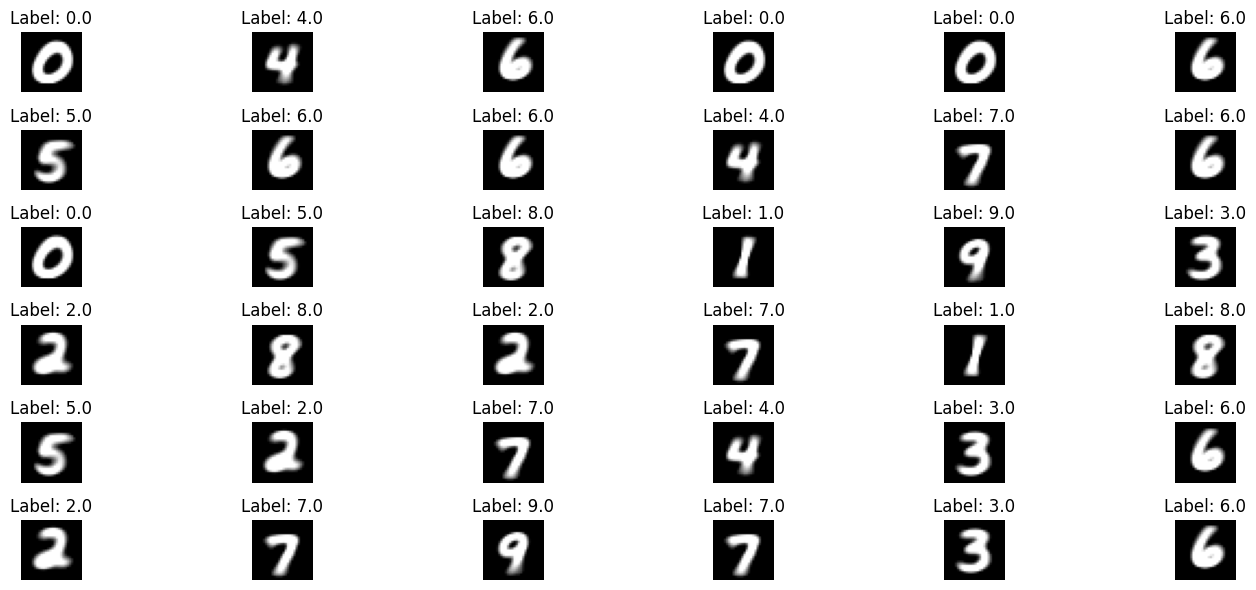

Testing: 100%|██████████| 79/79 [00:03<00:00, 25.35it/s]


Earth Mover's Distance: 0.9430794484813285
Real images accuracy: 0.0975, Fake images accuracy: 1.0


In [10]:
real_preds = 0
fake_preds = 0
emd_real_images = torch.empty(0, ).to(device)
emd_fake_images = torch.empty(0, ).to(device)
labels_list = torch.empty(0, ).to(device)


model = load_classifier('mnist', model_path=os.path.join('..', 'weights', 'mnist_classifier.pth'))
x=0
for batch_idx, (images, labels) in enumerate(tqdm(testloader, f"Testing: ")):
    images = images.to(device)
    labels = labels.to(device)
    if(batch_idx == 0):
        plot_images(fake_images.cpu(), fake_labels.cpu(), num_images=36, num_cols=6, num_rows=6)
    emd_real_images = torch.cat((emd_real_images, images), dim=0)
    emd_fake_images = torch.cat((emd_fake_images, fake_images[x:x+len(images)]), dim=0)
    labels_list = torch.cat((labels_list, labels), dim=0)
    real_preds_temp, fake_preds_temp = classifier_accuracy(model, images, fake_images[x:x+len(images)], fake_labels[x:x+128], 'mnist',
                                                           device)
    real_preds += real_preds_temp
    fake_preds += fake_preds_temp
    x += 128

real_accuracy = real_preds / len(test_dataset)
fake_accuracy = fake_preds / len(test_dataset)

emd = calculate_emd(emd_real_images, emd_fake_images)
# pca_real, pca_fake = pca_images(emd_real_images, emd_fake_images)
# plot_pca(pca_real, pca_fake, labels_list)
print(f"Earth Mover's Distance: {emd}")
print(f"Real images accuracy: {real_accuracy}, Fake images accuracy: {fake_accuracy}")

RuntimeError: number of dims don't match in permute

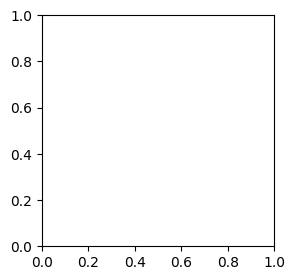

In [6]:
from gan_evaluation import plot_images_index

# get positions of labels from 0 to 9 in fake_labels
label_plot = []
for i in range(10):
    label_plot.append(fake_labels.eq(i)[0].cpu())

# plot images for each label
plot_images_index(fake_images, fake_labels, label_plot)

Namespace(epochs=1, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 1/1 [01:27<00:00, 87.83s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 91.84it/s]

Earth Mover's Distance: 1.770293941282387
Real images accuracy: 0.9913, Fake images accuracy: 0.7477
Namespace(epochs=2, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 2/2 [02:49<00:00, 84.64s/it]

Testing: 100%|██████████| 313/313 [00:02<00:00, 105.23it/s]

Earth Mover's Distance: 1.8846482447602746
Real images accuracy: 0.9913, Fake images accuracy: 0.7615
Namespace(epochs=3, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 3/3 [04:09<00:00, 83.28s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 104.28it/s]

Earth Mover's Distance: 1.6900663576700619
Real images accuracy: 0.9913, Fake images accuracy: 0.8919
Namespace(epochs=5, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 5/5 [06:59<00:00, 83.87s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 101.72it/s]

Earth Mover's Distance: 1.7872845898622916
Real images accuracy: 0.9913, Fake images accuracy: 0.8656
Namespace(epochs=10, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 10/10 [13:55<00:00, 83.58s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 103.49it/s]

Earth Mover's Distance: 1.8200592723580336
Real images accuracy: 0.9913, Fake images accuracy: 0.9219
Namespace(epochs=25, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 25/25 [36:26<00:00, 87.45s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 99.50it/s] 

Earth Mover's Distance: 1.69723035241103
Real images accuracy: 0.9913, Fake images accuracy: 0.9535
Namespace(epochs=30, num_users=100, frac=0.1, local_ep=10, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)
ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)
Progress overall: 100%|██████████| 30/30 [43:08<00:00, 86.27s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 98.73it/s] 

Earth Mover's Distance: 1.651789320605345
Real images accuracy: 0.9913, Fake images accuracy: 0.9636

Namespace(epochs=5, num_users=100, frac=0.1, local_ep=1, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)

Experimental details:
    Model     : cgan
    Optimizer : sgd
    Learning  : 0.0002
    Global Rounds   : 5

    Federated parameters:
    IID
    Fraction of users  : 0.1
    Local Batch size   : 10
    Local Epochs       : 1

{'generator': ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
), 'discriminator': DiscriminatorForMNIST(
  (label_embedding): Embedding(10, 10)
  (main): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)}
  0%|          | 0/5 [00:00<?, ?it/s]

 | Global Training Round : 1 |

 20%|██        | 1/5 [01:16<05:06, 76.59s/it]

 | Global Training Round : 2 |

 40%|████      | 2/5 [02:25<03:37, 72.36s/it]
 
Avg Training Stats after 2 global rounds:
Training Loss : 0.3429944459608911
Train Accuracy: 0.00% 


 | Global Training Round : 3 |

 60%|██████    | 3/5 [03:35<02:22, 71.17s/it]

 | Global Training Round : 4 |

 80%|████████  | 4/5 [04:45<01:10, 70.65s/it]
 
Avg Training Stats after 4 global rounds:
Training Loss : 0.3569861944052779
Train Accuracy: 0.00% 


 | Global Training Round : 5 |

100%|██████████| 5/5 [05:55<00:00, 71.02s/it]

Testing: 100%|██████████| 313/313 [00:03<00:00, 95.21it/s] 
Earth Mover's Distance: 1.7343698086480466
Real images accuracy: 0.9913, Fake images accuracy: 0.1049

 Total Run Time: 359.3730
Namespace(epochs=10, num_users=100, frac=0.1, local_ep=1, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)

Experimental details:
    Model     : cgan
    Optimizer : sgd
    Learning  : 0.0002
    Global Rounds   : 10

    Federated parameters:
    IID
    Fraction of users  : 0.1
    Local Batch size   : 10
    Local Epochs       : 1

{'generator': ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
), 'discriminator': DiscriminatorForMNIST(
  (label_embedding): Embedding(10, 10)
  (main): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)}
  0%|          | 0/10 [00:00<?, ?it/s]

 | Global Training Round : 1 |

 10%|█         | 1/10 [01:10<10:32, 70.22s/it]

 | Global Training Round : 2 |

 20%|██        | 2/10 [02:20<09:20, 70.06s/it]
 
Avg Training Stats after 2 global rounds:
Training Loss : 0.3456660713193317
Train Accuracy: 0.00% 


 | Global Training Round : 3 |

 30%|███       | 3/10 [03:30<08:12, 70.33s/it]

 | Global Training Round : 4 |

 40%|████      | 4/10 [04:41<07:02, 70.44s/it]
 
Avg Training Stats after 4 global rounds:
Training Loss : 0.35846868493710643
Train Accuracy: 0.00% 


 | Global Training Round : 5 |

 50%|█████     | 5/10 [05:52<05:52, 70.51s/it]

 | Global Training Round : 6 |

 60%|██████    | 6/10 [07:03<04:43, 70.79s/it]
 
Avg Training Stats after 6 global rounds:
Training Loss : 0.36283865168535456
Train Accuracy: 0.00% 


 | Global Training Round : 7 |

 70%|███████   | 7/10 [08:14<03:32, 70.79s/it]

 | Global Training Round : 8 |

 80%|████████  | 8/10 [09:24<02:21, 70.69s/it]
 
Avg Training Stats after 8 global rounds:
Training Loss : 0.36522024645431284
Train Accuracy: 0.00% 


 | Global Training Round : 9 |

 90%|█████████ | 9/10 [10:35<01:10, 70.72s/it]

 | Global Training Round : 10 |

100%|██████████| 10/10 [11:46<00:00, 70.62s/it]
 
Avg Training Stats after 10 global rounds:
Training Loss : 0.36751763582881547
Train Accuracy: 0.00% 



Testing: 100%|██████████| 313/313 [00:03<00:00, 96.57it/s] 
Earth Mover's Distance: 1.73819696875298
Real images accuracy: 0.9913, Fake images accuracy: 0.168

 Total Run Time: 710.4001
Namespace(epochs=30, num_users=100, frac=0.1, local_ep=1, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)

Experimental details:
    Model     : cgan
    Optimizer : sgd
    Learning  : 0.0002
    Global Rounds   : 30

    Federated parameters:
    IID
    Fraction of users  : 0.1
    Local Batch size   : 10
    Local Epochs       : 1

{'generator': ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
), 'discriminator': DiscriminatorForMNIST(
  (label_embedding): Embedding(10, 10)
  (main): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)}
  0%|          | 0/30 [00:00<?, ?it/s]

 | Global Training Round : 1 |

  3%|▎         | 1/30 [01:10<34:16, 70.93s/it]

 | Global Training Round : 2 |

  7%|▋         | 2/30 [02:22<33:10, 71.10s/it]
 
Avg Training Stats after 2 global rounds:
Training Loss : 0.33922144073682536
Train Accuracy: 0.00% 


 | Global Training Round : 3 |

 10%|█         | 3/30 [03:32<31:53, 70.88s/it]

 | Global Training Round : 4 |

 13%|█▎        | 4/30 [04:42<30:31, 70.44s/it]
 
Avg Training Stats after 4 global rounds:
Training Loss : 0.3555189027959327
Train Accuracy: 0.00% 


 | Global Training Round : 5 |

 17%|█▋        | 5/30 [05:52<29:12, 70.11s/it]

 | Global Training Round : 6 |

 20%|██        | 6/30 [07:01<27:59, 70.00s/it]
 
Avg Training Stats after 6 global rounds:
Training Loss : 0.3614840256536587
Train Accuracy: 0.00% 


 | Global Training Round : 7 |

 23%|██▎       | 7/30 [08:11<26:47, 69.89s/it]

 | Global Training Round : 8 |

 27%|██▋       | 8/30 [09:21<25:36, 69.86s/it]
 
Avg Training Stats after 8 global rounds:
Training Loss : 0.36431437733292116
Train Accuracy: 0.00% 


 | Global Training Round : 9 |

 30%|███       | 9/30 [10:31<24:26, 69.82s/it]

 | Global Training Round : 10 |

 33%|███▎      | 10/30 [11:40<23:14, 69.71s/it]
 
Avg Training Stats after 10 global rounds:
Training Loss : 0.3665728382826782
Train Accuracy: 0.00% 


 | Global Training Round : 11 |

 37%|███▋      | 11/30 [12:50<22:03, 69.67s/it]

 | Global Training Round : 12 |

 40%|████      | 12/30 [13:58<20:49, 69.42s/it]
 
Avg Training Stats after 12 global rounds:
Training Loss : 0.36856783189707326
Train Accuracy: 0.00% 


 | Global Training Round : 13 |

 43%|████▎     | 13/30 [15:08<19:40, 69.42s/it]

 | Global Training Round : 14 |

 47%|████▋     | 14/30 [16:18<18:34, 69.65s/it]
 
Avg Training Stats after 14 global rounds:
Training Loss : 0.37024329318897786
Train Accuracy: 0.00% 


 | Global Training Round : 15 |

 50%|█████     | 15/30 [17:28<17:27, 69.80s/it]

 | Global Training Round : 16 |

 53%|█████▎    | 16/30 [18:39<16:20, 70.03s/it]
 
Avg Training Stats after 16 global rounds:
Training Loss : 0.3718821526091779
Train Accuracy: 0.00% 


 | Global Training Round : 17 |

 57%|█████▋    | 17/30 [19:49<15:12, 70.22s/it]

 | Global Training Round : 18 |

 60%|██████    | 18/30 [21:00<14:03, 70.32s/it]
 
Avg Training Stats after 18 global rounds:
Training Loss : 0.3734223114777598
Train Accuracy: 0.00% 


 | Global Training Round : 19 |

 63%|██████▎   | 19/30 [22:12<13:00, 70.95s/it]

 | Global Training Round : 20 |

 67%|██████▋   | 20/30 [23:24<11:50, 71.02s/it]
 
Avg Training Stats after 20 global rounds:
Training Loss : 0.3747408212326312
Train Accuracy: 0.00% 


 | Global Training Round : 21 |

 70%|███████   | 21/30 [24:34<10:38, 70.99s/it]

 | Global Training Round : 22 |

 73%|███████▎  | 22/30 [25:45<09:27, 70.95s/it]
 
Avg Training Stats after 22 global rounds:
Training Loss : 0.3758363744754796
Train Accuracy: 0.00% 


 | Global Training Round : 23 |

 77%|███████▋  | 23/30 [26:56<08:16, 70.92s/it]

 | Global Training Round : 24 |

 80%|████████  | 24/30 [28:07<07:04, 70.82s/it]
 
Avg Training Stats after 24 global rounds:
Training Loss : 0.3769014209479145
Train Accuracy: 0.00% 


 | Global Training Round : 25 |

 83%|████████▎ | 25/30 [29:17<05:53, 70.77s/it]

 | Global Training Round : 26 |

 87%|████████▋ | 26/30 [30:28<04:42, 70.68s/it]
 
Avg Training Stats after 26 global rounds:
Training Loss : 0.37793264341743615
Train Accuracy: 0.00% 


 | Global Training Round : 27 |

 90%|█████████ | 27/30 [31:38<03:31, 70.58s/it]

 | Global Training Round : 28 |

 93%|█████████▎| 28/30 [32:49<02:21, 70.51s/it]
 
Avg Training Stats after 28 global rounds:
Training Loss : 0.37885776222350875
Train Accuracy: 0.00% 


 | Global Training Round : 29 |

 97%|█████████▋| 29/30 [33:59<01:10, 70.42s/it]

 | Global Training Round : 30 |

100%|██████████| 30/30 [35:09<00:00, 70.32s/it]
 
Avg Training Stats after 30 global rounds:
Training Loss : 0.3796159463276466
Train Accuracy: 0.00% 



Testing: 100%|██████████| 313/313 [00:03<00:00, 100.02it/s]
Earth Mover's Distance: 1.693064839527788
Real images accuracy: 0.9913, Fake images accuracy: 0.4777

 Total Run Time: 2113.6522
Namespace(epochs=40, num_users=100, frac=0.1, local_ep=1, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)

Experimental details:
    Model     : cgan
    Optimizer : sgd
    Learning  : 0.0002
    Global Rounds   : 40

    Federated parameters:
    IID
    Fraction of users  : 0.1
    Local Batch size   : 10
    Local Epochs       : 1

{'generator': ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
), 'discriminator': DiscriminatorForMNIST(
  (label_embedding): Embedding(10, 10)
  (main): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)}
  0%|          | 0/40 [00:00<?, ?it/s]

 | Global Training Round : 1 |

  2%|▎         | 1/40 [01:11<46:23, 71.38s/it]

 | Global Training Round : 2 |

  5%|▌         | 2/40 [02:21<44:44, 70.65s/it]
 
Avg Training Stats after 2 global rounds:
Training Loss : 0.34647209265502177
Train Accuracy: 0.00% 


 | Global Training Round : 3 |

  8%|▊         | 3/40 [03:31<43:29, 70.54s/it]

 | Global Training Round : 4 |

 10%|█         | 4/40 [04:42<42:12, 70.36s/it]
 
Avg Training Stats after 4 global rounds:
Training Loss : 0.3594051106728148
Train Accuracy: 0.00% 


 | Global Training Round : 5 |

 12%|█▎        | 5/40 [05:52<40:59, 70.28s/it]

 | Global Training Round : 6 |

 15%|█▌        | 6/40 [07:02<39:48, 70.25s/it]
 
Avg Training Stats after 6 global rounds:
Training Loss : 0.3636980971414596
Train Accuracy: 0.00% 


 | Global Training Round : 7 |

 18%|█▊        | 7/40 [08:12<38:42, 70.37s/it]

 | Global Training Round : 8 |

 20%|██        | 8/40 [09:23<37:34, 70.46s/it]
 
Avg Training Stats after 8 global rounds:
Training Loss : 0.3654125579852068
Train Accuracy: 0.00% 


 | Global Training Round : 9 |

 22%|██▎       | 9/40 [10:34<36:23, 70.44s/it]

 | Global Training Round : 10 |

 25%|██▌       | 10/40 [11:44<35:13, 70.44s/it]
 
Avg Training Stats after 10 global rounds:
Training Loss : 0.36812378431794546
Train Accuracy: 0.00% 


 | Global Training Round : 11 |

 28%|██▊       | 11/40 [12:55<34:05, 70.54s/it]

 | Global Training Round : 12 |

 30%|███       | 12/40 [14:05<32:50, 70.39s/it]
 
Avg Training Stats after 12 global rounds:
Training Loss : 0.37007812531703776
Train Accuracy: 0.00% 


 | Global Training Round : 13 |

 32%|███▎      | 13/40 [15:15<31:42, 70.46s/it]

 | Global Training Round : 14 |

 35%|███▌      | 14/40 [16:26<30:32, 70.47s/it]
 
Avg Training Stats after 14 global rounds:
Training Loss : 0.3718322710362485
Train Accuracy: 0.00% 


 | Global Training Round : 15 |

 38%|███▊      | 15/40 [17:37<29:25, 70.61s/it]

 | Global Training Round : 16 |

 40%|████      | 16/40 [18:47<28:11, 70.50s/it]
 
Avg Training Stats after 16 global rounds:
Training Loss : 0.3735041908427956
Train Accuracy: 0.00% 


 | Global Training Round : 17 |

 42%|████▎     | 17/40 [19:58<27:02, 70.56s/it]

 | Global Training Round : 18 |

 45%|████▌     | 18/40 [21:08<25:52, 70.56s/it]
 
Avg Training Stats after 18 global rounds:
Training Loss : 0.37485829794253395
Train Accuracy: 0.00% 


 | Global Training Round : 19 |

 48%|████▊     | 19/40 [22:19<24:44, 70.67s/it]

 | Global Training Round : 20 |

 50%|█████     | 20/40 [23:36<24:06, 72.35s/it]
 
Avg Training Stats after 20 global rounds:
Training Loss : 0.37598227543197577
Train Accuracy: 0.00% 


 | Global Training Round : 21 |

 52%|█████▎    | 21/40 [24:48<22:53, 72.31s/it]

 | Global Training Round : 22 |

 55%|█████▌    | 22/40 [26:00<21:39, 72.20s/it]
 
Avg Training Stats after 22 global rounds:
Training Loss : 0.37675361091927206
Train Accuracy: 0.00% 


 | Global Training Round : 23 |

 57%|█████▊    | 23/40 [27:12<20:25, 72.10s/it]

 | Global Training Round : 24 |

 60%|██████    | 24/40 [28:23<19:11, 71.94s/it]
 
Avg Training Stats after 24 global rounds:
Training Loss : 0.37740375731864734
Train Accuracy: 0.00% 


 | Global Training Round : 25 |

 62%|██████▎   | 25/40 [29:35<17:57, 71.85s/it]

 | Global Training Round : 26 |

 65%|██████▌   | 26/40 [30:48<16:50, 72.18s/it]
 
Avg Training Stats after 26 global rounds:
Training Loss : 0.3779948707155358
Train Accuracy: 0.00% 


 | Global Training Round : 27 |

 68%|██████▊   | 27/40 [32:00<15:39, 72.29s/it]

 | Global Training Round : 28 |

 70%|███████   | 28/40 [33:13<14:30, 72.50s/it]
 
Avg Training Stats after 28 global rounds:
Training Loss : 0.37861758584311855
Train Accuracy: 0.00% 


 | Global Training Round : 29 |

 72%|███████▎  | 29/40 [34:26<13:19, 72.69s/it]

 | Global Training Round : 30 |

 75%|███████▌  | 30/40 [35:39<12:07, 72.71s/it]
 
Avg Training Stats after 30 global rounds:
Training Loss : 0.37921803154346223
Train Accuracy: 0.00% 


 | Global Training Round : 31 |

 78%|███████▊  | 31/40 [36:52<10:54, 72.69s/it]

 | Global Training Round : 32 |

 80%|████████  | 32/40 [38:05<09:42, 72.79s/it]
 
Avg Training Stats after 32 global rounds:
Training Loss : 0.3798205604668571
Train Accuracy: 0.00% 


 | Global Training Round : 33 |

 82%|████████▎ | 33/40 [39:19<08:32, 73.24s/it]

 | Global Training Round : 34 |

 85%|████████▌ | 34/40 [40:30<07:15, 72.58s/it]
 
Avg Training Stats after 34 global rounds:
Training Loss : 0.3803870637317681
Train Accuracy: 0.00% 


 | Global Training Round : 35 |

 88%|████████▊ | 35/40 [41:41<06:00, 72.11s/it]

 | Global Training Round : 36 |

 90%|█████████ | 36/40 [42:53<04:48, 72.16s/it]
 
Avg Training Stats after 36 global rounds:
Training Loss : 0.380950144068726
Train Accuracy: 0.00% 


 | Global Training Round : 37 |

 92%|█████████▎| 37/40 [44:06<03:36, 72.27s/it]

 | Global Training Round : 38 |

 95%|█████████▌| 38/40 [45:19<02:24, 72.43s/it]
 
Avg Training Stats after 38 global rounds:
Training Loss : 0.3814782117011859
Train Accuracy: 0.00% 


 | Global Training Round : 39 |

 98%|█████████▊| 39/40 [46:31<01:12, 72.45s/it]

 | Global Training Round : 40 |

100%|██████████| 40/40 [47:43<00:00, 71.59s/it]
 
Avg Training Stats after 40 global rounds:
Training Loss : 0.3819541406659409
Train Accuracy: 0.00% 



Testing: 100%|██████████| 313/313 [00:03<00:00, 96.48it/s]
Earth Mover's Distance: 1.733185245650577
Real images accuracy: 0.9913, Fake images accuracy: 0.5904

 Total Run Time: 2867.6917
Namespace(epochs=50, num_users=100, frac=0.1, local_ep=1, local_bs=10, lr=0.0002, momentum=0.5, model='cgan', kernel_num=9, kernel_sizes='3,4,5', num_channels=1, norm='batch_norm', num_filters=32, max_pool='True', dataset='mnist', num_classes=10, gpu='cuda:0', optimizer='sgd', iid=1, dirichlet=0.5, unequal=0, noise=100, stopping_rounds=10, verbose=1, seed=1)

Experimental details:
    Model     : cgan
    Optimizer : sgd
    Learning  : 0.0002
    Global Rounds   : 50

    Federated parameters:
    IID
    Fraction of users  : 0.1
    Local Batch size   : 10
    Local Epochs       : 1

{'generator': ConvGenerator(
  (label_embedding): Embedding(10, 10)
  (l1): Sequential(
    (0): Linear(in_features=110, out_features=6272, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
), 'discriminator': DiscriminatorForMNIST(
  (label_embedding): Embedding(10, 10)
  (main): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)}
  0%|          | 0/50 [00:00<?, ?it/s]

 | Global Training Round : 1 |

  2%|▏         | 1/50 [01:12<59:00, 72.26s/it]

 | Global Training Round : 2 |

  4%|▍         | 2/50 [02:24<57:51, 72.33s/it]
 
Avg Training Stats after 2 global rounds:
Training Loss : 0.3466571727744305
Train Accuracy: 0.00% 


 | Global Training Round : 3 |

  6%|▌         | 3/50 [03:36<56:27, 72.08s/it]

 | Global Training Round : 4 |

  8%|▊         | 4/50 [04:48<55:18, 72.15s/it]
 
Avg Training Stats after 4 global rounds:
Training Loss : 0.359296442042105
Train Accuracy: 0.00% 


 | Global Training Round : 5 |

 10%|█         | 5/50 [06:00<54:05, 72.12s/it]

 | Global Training Round : 6 |

 12%|█▏        | 6/50 [07:13<52:58, 72.24s/it]
 
Avg Training Stats after 6 global rounds:
Training Loss : 0.3639436863567164
Train Accuracy: 0.00% 


 | Global Training Round : 7 |

 14%|█▍        | 7/50 [08:25<51:52, 72.39s/it]

 | Global Training Round : 8 |

 16%|█▌        | 8/50 [09:38<50:40, 72.40s/it]
 
Avg Training Stats after 8 global rounds:
Training Loss : 0.36593366151500967
Train Accuracy: 0.00% 


 | Global Training Round : 9 |

 18%|█▊        | 9/50 [10:50<49:24, 72.31s/it]

 | Global Training Round : 10 |

 20%|██        | 10/50 [12:03<48:19, 72.49s/it]
 
Avg Training Stats after 10 global rounds:
Training Loss : 0.36846458462066956
Train Accuracy: 0.00% 


 | Global Training Round : 11 |

 22%|██▏       | 11/50 [13:16<47:10, 72.57s/it]

 | Global Training Round : 12 |

 24%|██▍       | 12/50 [14:29<46:05, 72.77s/it]
 
Avg Training Stats after 12 global rounds:
Training Loss : 0.3711285312138757
Train Accuracy: 0.00% 


 | Global Training Round : 13 |

 26%|██▌       | 13/50 [15:42<44:56, 72.88s/it]

 | Global Training Round : 14 |

 28%|██▊       | 14/50 [16:55<43:46, 72.96s/it]
 
Avg Training Stats after 14 global rounds:
Training Loss : 0.3735004013345488
Train Accuracy: 0.00% 


 | Global Training Round : 15 |

 30%|███       | 15/50 [18:09<42:39, 73.13s/it]

 | Global Training Round : 16 |

 32%|███▏      | 16/50 [19:22<41:26, 73.14s/it]
 
Avg Training Stats after 16 global rounds:
Training Loss : 0.3754856796786772
Train Accuracy: 0.00% 


 | Global Training Round : 17 |

 34%|███▍      | 17/50 [20:35<40:12, 73.10s/it]

 | Global Training Round : 18 |

 36%|███▌      | 18/50 [21:48<38:59, 73.12s/it]
 
Avg Training Stats after 18 global rounds:
Training Loss : 0.37727969948340356
Train Accuracy: 0.00% 


 | Global Training Round : 19 |

 38%|███▊      | 19/50 [23:01<37:43, 73.02s/it]

 | Global Training Round : 20 |

 40%|████      | 20/50 [24:14<36:31, 73.05s/it]
 
Avg Training Stats after 20 global rounds:
Training Loss : 0.37887312995991673
Train Accuracy: 0.00% 


 | Global Training Round : 21 |

 42%|████▏     | 21/50 [25:27<35:18, 73.05s/it]

 | Global Training Round : 22 |

 44%|████▍     | 22/50 [26:39<33:53, 72.64s/it]
 
Avg Training Stats after 22 global rounds:
Training Loss : 0.3802560967860998
Train Accuracy: 0.00% 


 | Global Training Round : 23 |

 46%|████▌     | 23/50 [27:50<32:35, 72.41s/it]

 | Global Training Round : 24 |

 48%|████▊     | 24/50 [29:02<31:17, 72.19s/it]
 
Avg Training Stats after 24 global rounds:
Training Loss : 0.3815438819626191
Train Accuracy: 0.00% 


 | Global Training Round : 25 |

 50%|█████     | 25/50 [30:15<30:07, 72.29s/it]

 | Global Training Round : 26 |

 52%|█████▏    | 26/50 [31:27<28:56, 72.34s/it]
 
Avg Training Stats after 26 global rounds:
Training Loss : 0.38265846216006394
Train Accuracy: 0.00% 


 | Global Training Round : 27 |

 54%|█████▍    | 27/50 [32:39<27:42, 72.26s/it]

 | Global Training Round : 28 |

 56%|█████▌    | 28/50 [33:52<26:36, 72.56s/it]
 
Avg Training Stats after 28 global rounds:
Training Loss : 0.38320696834674367
Train Accuracy: 0.00% 


 | Global Training Round : 29 |

 58%|█████▊    | 29/50 [35:05<25:25, 72.62s/it]

 | Global Training Round : 30 |

 60%|██████    | 30/50 [36:18<24:14, 72.74s/it]
 
Avg Training Stats after 30 global rounds:
Training Loss : 0.3834984335240183
Train Accuracy: 0.00% 


 | Global Training Round : 31 |

 62%|██████▏   | 31/50 [37:32<23:10, 73.16s/it]

 | Global Training Round : 32 |

 64%|██████▍   | 32/50 [38:44<21:48, 72.69s/it]
 
Avg Training Stats after 32 global rounds:
Training Loss : 0.3837146082965288
Train Accuracy: 0.00% 


 | Global Training Round : 33 |

 66%|██████▌   | 33/50 [39:54<20:23, 71.98s/it]

 | Global Training Round : 34 |

 68%|██████▊   | 34/50 [41:05<19:05, 71.62s/it]
 
Avg Training Stats after 34 global rounds:
Training Loss : 0.3839342986270511
Train Accuracy: 0.00% 


 | Global Training Round : 35 |

 70%|███████   | 35/50 [42:16<17:52, 71.48s/it]

 | Global Training Round : 36 |

 72%|███████▏  | 36/50 [43:27<16:37, 71.26s/it]
 
Avg Training Stats after 36 global rounds:
Training Loss : 0.3842067390191368
Train Accuracy: 0.00% 


 | Global Training Round : 37 |

 74%|███████▍  | 37/50 [44:38<15:23, 71.06s/it]

 | Global Training Round : 38 |

 76%|███████▌  | 38/50 [45:47<14:07, 70.60s/it]
 
Avg Training Stats after 38 global rounds:
Training Loss : 0.3844794711378697
Train Accuracy: 0.00% 


 | Global Training Round : 39 |

 78%|███████▊  | 39/50 [46:57<12:54, 70.44s/it]

 | Global Training Round : 40 |

 80%|████████  | 40/50 [48:07<11:43, 70.33s/it]
 
Avg Training Stats after 40 global rounds:
Training Loss : 0.3847811912838369
Train Accuracy: 0.00% 


 | Global Training Round : 41 |

 82%|████████▏ | 41/50 [49:17<10:31, 70.19s/it]

 | Global Training Round : 42 |

 84%|████████▍ | 42/50 [50:27<09:20, 70.09s/it]
 
Avg Training Stats after 42 global rounds:
Training Loss : 0.38507100483890444
Train Accuracy: 0.00% 


 | Global Training Round : 43 |

 86%|████████▌ | 43/50 [51:36<08:08, 69.80s/it]

 | Global Training Round : 44 |

 88%|████████▊ | 44/50 [52:46<06:59, 69.85s/it]
 
Avg Training Stats after 44 global rounds:
Training Loss : 0.38535182611261853
Train Accuracy: 0.00% 


 | Global Training Round : 45 |

 90%|█████████ | 45/50 [53:56<05:49, 69.98s/it]

 | Global Training Round : 46 |

 92%|█████████▏| 46/50 [55:07<04:40, 70.24s/it]
 
Avg Training Stats after 46 global rounds:
Training Loss : 0.3856295013982141
Train Accuracy: 0.00% 


 | Global Training Round : 47 |

 94%|█████████▍| 47/50 [56:20<03:32, 70.95s/it]

 | Global Training Round : 48 |

 96%|█████████▌| 48/50 [57:32<02:22, 71.30s/it]
 
Avg Training Stats after 48 global rounds:
Training Loss : 0.3858929999129032
Train Accuracy: 0.00% 


 | Global Training Round : 49 |

 98%|█████████▊| 49/50 [58:42<01:10, 70.88s/it]

 | Global Training Round : 50 |

100%|██████████| 50/50 [59:52<00:00, 71.85s/it]
 
Avg Training Stats after 50 global rounds:
Training Loss : 0.3861291934314805
Train Accuracy: 0.00% 



Testing: 100%|██████████| 313/313 [00:03<00:00, 100.34it/s]
Earth Mover's Distance: 1.7228743457995659
Real images accuracy: 0.9913, Fake images accuracy: 0.6741

 Total Run Time: 3596.2502